In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import plot_tools

In [6]:
data = fetch_olivetti_faces()
targets = data.target
data = data.images.reshape((len(data.images), -1))

test_idx = [1,  87,  94, 78]
train_idx = np.array(list(set(list(range(data.shape[0]))) - set(test_idx) ) )

train_set = data[train_idx ]
y_train = targets[train_idx] 
test_set = data[np.array(test_idx)]
y_test = targets[ np.array(test_idx)]
testImage = test_set[0, :]
print(train_set.shape,test_set.shape, testImage.shape)


(396, 4096) (4, 4096) (4096,)


In [37]:
def compute_nearest_neighbors(train_matrix, testImage):
    distances = np.sqrt(np.sum((train_matrix-testImage)**2,axis=1))
    print(distances.shape)
    sorted_image_index = np.argsort(distances)
    print(sorted_image_index[0])
    closest_image = train_matrix[sorted_image_index[0]]
    print(closest_image.shape)
    return sorted_image_index[0]
   

In [52]:
print(compute_nearest_neighbors(train_set, testImage))

(396,)
77
(4096,)
77


In [56]:
imgs = []
estLabels = []
nnIdx = compute_nearest_neighbors(train_set, testImage)
imgs.extend( [testImage, train_set[nnIdx,:]] )
estLabels.append(y_train[nnIdx])

(396,)
77
(4096,)


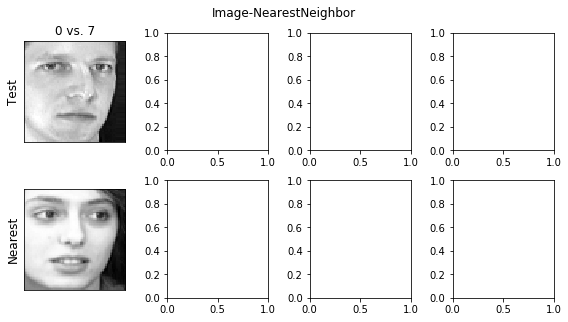

In [58]:
row_titles = ['Test','Nearest']
col_titles = ['%d vs. %d'%(i,j) for i,j in zip(y_test, estLabels)]
plot_tools.plot_image_grid(imgs,
                    "Image-NearestNeighbor",
                    (64,64), len(test_set),2,True,row_titles=row_titles,col_titles=col_titles)